In [32]:
import numpy as np
import pandas as pd
from nilearn import datasets, image, input_data 
import nibabel as nib
from nilearn.input_data import NiftiMasker
from nilearn.input_data.nifti_spheres_masker import  \
    _apply_mask_and_get_affinity

### Transform EPI to T1 space

In [4]:
func_file = '/home/despo/dlurie/Projects/despolab_lesion/pipeline_testing/test_out/derivatives/sub-185/func/sub-185_task-rest_run-01_bold_preproc.nii.gz'

In [5]:
brain_mask_file = '/home/despo/dlurie/Projects/despolab_lesion/pipeline_testing/test_out/derivatives/sub-185/func/sub-185_task-rest_run-01_bold_brainmask.nii.gz'

In [15]:
brain_mask_img = nib.load(brain_mask_file)

In [6]:
power2011_csv = '/home/despo/dlurie/Projects/despolab_lesion/transform_testing/power_coords_EPI.csv'

In [13]:
power2011 = pd.read_csv(power2011_csv).as_matrix()

In [14]:
power2011.shape

(264, 3)

Nilearn throws an error about empty spheres if we don't give a large enough radius. Problem is, a 5mm radius, although it matches what was used in the original paper, results in overlapping spheres, so we have to allow overlap.

In [34]:
confounds_file = '/home/despo/dlurie/Projects/despolab_lesion/pipeline_testing/test_out/derivatives/sub-185/func/sub-185_task-rest_run-01_bold_confounds.tsv'

In [35]:
all_confounds = pd.read_csv(confounds_file, sep='\t')

In [24]:
nuisance_vars = all_confounds[['aCompCor0', 'aCompCor1', 'aCompCor2', 'aCompCor3', 'aCompCor4',
                              'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ']]

In [26]:
!mkdir matrix_gen_testing

In [27]:
nuisance_vars.to_csv('matrix_gen_testing/nuisance.csv', sep=',', index=False)

In [46]:
spheres_masker = input_data.NiftiSpheresMasker(seeds=power2011, smoothing_fwhm=6, radius=5, mask_img=brain_mask_img,
                                               detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2.0,
                                              allow_overlap=True)

In [47]:
timeseries = spheres_masker.fit_transform(func_file,
                                          confounds='matrix_gen_testing/nuisance.csv')

In [48]:
timeseries.shape

(300, 264)

In [50]:
import matplotlib.pyplot as plt
from nilearn import plotting, connectome

In [57]:
corrmat = np.corrcoef(timeseries.T)

In [59]:
%matplotlib inline

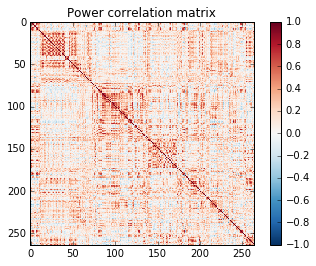

In [60]:
plt.imshow(corrmat, vmin=-1., vmax=1., cmap='RdBu_r', interpolation='nearest')
plt.colorbar()
plt.title('Power correlation matrix')

In [61]:
np.savetxt('matrix_gen_testing/power2011_corr.txt', corrmat)